# The Sparks Foundation - Data Science & Business Analytics Internship

### TASK 2 - Prediction using Unsupervised Machine Learning

By:
  - A E JEEVA
  - jeeva.ae21@gmail.com
  -  https://www.linkedin.com/in/jeevaae/

Steps :
- Step 1 - Importing the dataset
- Step 2 - Visualisng the data
- Step 3 - Using Elbow Method to find optimum number of clusters 
- Step 4 - Applying k-means clustering on the data
- Step 5 - Visualising the clusters

#### Problem Statement

The objective of this project is to Predict Optimum number of cluster by using given "Iris" Dataset

#### Data Collection

The data set consists samples of three species of Iris (Iris setosa, Iris virginica and Iris versicolor).

Data Dictionary:
- Dataset contains 150 sapmples of Iris data
- 6 features are recorded for each Iris samples 

Discription:
- SepalLengthCm - Sepal Length of Iris flower
- SepalWidthCm -  Sepal Width of Iris flower
- WidthLengthCm - Petal Length of Iris flower
- PetalWidthCm  - Petal Width of Iris flower
- Species -  Type of Iris flower

#### Step 1 - Importing the dataset

In [1]:
# Importing the required libraries

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn import datasets
from sklearn.cluster import KMeans
import seaborn as sns

### Suppress the Warnings

In [2]:
# To ignore the warnings 
import warnings as wg
wg.filterwarnings("ignore")

In [3]:
# Reading data iris dataset 
iris_data = pd.read_csv(r"C:\Users\jeeva\Downloads\Iris.csv")

#### Step 2 - Visualisng the data

In [4]:
iris_data.head(10) # Visualisng first 10 data points

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa
5,6,5.4,3.9,1.7,0.4,Iris-setosa
6,7,4.6,3.4,1.4,0.3,Iris-setosa
7,8,5.0,3.4,1.5,0.2,Iris-setosa
8,9,4.4,2.9,1.4,0.2,Iris-setosa
9,10,4.9,3.1,1.5,0.1,Iris-setosa


In [5]:
iris_data.tail(10)# Visualisng last 10 data points

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
140,141,6.7,3.1,5.6,2.4,Iris-virginica
141,142,6.9,3.1,5.1,2.3,Iris-virginica
142,143,5.8,2.7,5.1,1.9,Iris-virginica
143,144,6.8,3.2,5.9,2.3,Iris-virginica
144,145,6.7,3.3,5.7,2.5,Iris-virginica
145,146,6.7,3.0,5.2,2.3,Iris-virginica
146,147,6.3,2.5,5.0,1.9,Iris-virginica
147,148,6.5,3.0,5.2,2.0,Iris-virginica
148,149,6.2,3.4,5.4,2.3,Iris-virginica
149,150,5.9,3.0,5.1,1.8,Iris-virginica


In [6]:
iris_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


In [7]:
 iris_data.isnull().sum() # checking Null values in the data set 

Id               0
SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

In [8]:
iris_data.shape # Checking shape of a data set 

(150, 6)

**Cleaning Unwanted columns**

ID is an identity to each iris data. Analytically it does not have any value (Nominal data). We can safely ignore the ID column by dropping the column.

In [9]:
iris_data.drop(['Id'], axis = 1, inplace = True)

In [10]:
iris_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   SepalLengthCm  150 non-null    float64
 1   SepalWidthCm   150 non-null    float64
 2   PetalLengthCm  150 non-null    float64
 3   PetalWidthCm   150 non-null    float64
 4   Species        150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


**Handling duplicates:**

If the dataset has multiple entries of the same record then we can remove the duplicate entries. In our dataset we dont have duplicates. In case of duplicates we will use function drop_duplicates()

In [11]:
duplicate = iris_data.duplicated()  # Returns Boolean Series denoting duplicate rows.
duplicate
sum(duplicate)

3

In [12]:
# Removing Duplicates
iris_data = iris_data.drop_duplicates() # Returns DataFrame with duplicate rows removed.

In [13]:
iris_data.shape # we have doroped 3 duplicate values 

(147, 5)

#### Dividing Categorical and Numerical variables from dataset

In [14]:
iris_data

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica


In [15]:
iris_data_cate = iris_data.iloc[:, 4:]
iris_data_cate.head()

,Species
0,Iris-setosa
1,Iris-setosa
2,Iris-setosa
3,Iris-setosa
4,Iris-setosa


In [16]:
iris_data_num = iris_data.iloc[:, :4]
iris_data_num.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


#### Box Plot

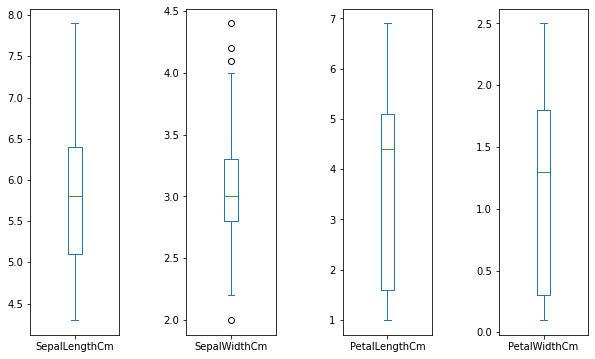

In [17]:
# Multiple boxplots in a single visualization.
# Columns with larger scales affect other columns. 
# Below code ensures each column gets its own y-axis.

# pandas plot() function with parameters kind = 'box' and subplots = True

iris_data_num.plot(kind = 'box', subplots = True, sharey = False, figsize = (10, 6)) 

'''sharey True or 'all': x- or y-axis will be shared among all subplots.
False or 'none': each subplot x- or y-axis will be independent.'''


# increase spacing between subplots
plt.subplots_adjust(wspace = 0.75) # ws is the width of the padding between subplots, as a fraction of the average Axes width.
plt.show()  

Boxplots show outliers in: SepalWidthCm

***Outlier Analysis***: 
We shall use Winsorization Technique to treat outliers

Winsorization function rounds off the exceptional data points based on capping method used in parameters/hyperparameters section.

In [18]:
from feature_engine.outliers import Winsorizer #importing required package

In [19]:
# Winsorization for "SepalWidthCm" column
winsor = Winsorizer(capping_method = 'iqr', # choose IQR rule boundary
                          tail = 'both', # cap left, right or both tails 
                          fold = 1.5,
                          variables = ['SepalWidthCm'])

iris_data_num['SepalWidthCm'] = winsor.fit_transform(iris_data_num[['SepalWidthCm']]) # this is replacing the outliers to cap values


#### Verify for outliers post the treatment

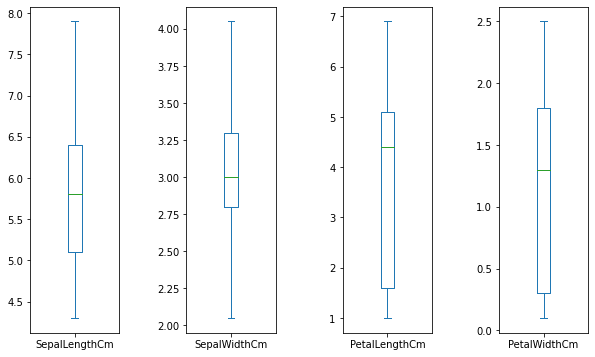

In [20]:
iris_data_num.plot(kind = 'box', subplots = True, sharey = False, figsize = (10, 6)) #sharey = True shares the Y axis across all plots


# increase spacing between subplots
plt.subplots_adjust(wspace = 0.75) 
plt.show()  

#### Step 3 - Using Elbow Method to find optimum number of clusters

In [21]:
# Libraries for creating scree plot or elbow curve 
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

In [22]:
TWSS = []
k = list(range(2, 9))

for i in k:
    kmeans = KMeans(n_clusters = i)
    kmeans.fit(iris_data_num)
    TWSS.append(kmeans.inertia_)

TWSS

[150.78429381127452,
 77.01300425115042,
 55.7467828525641,
 44.924394846491225,
 37.76207381832382,
 33.35567784676337,
 29.16690875491611]

#### Creating a scree plot to find out no.of cluster

Text(0, 0.5, 'total_within_SS')

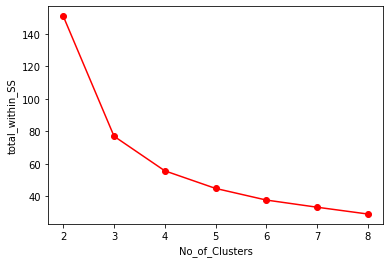

In [23]:
plt.plot(k, TWSS, 'ro-'); plt.xlabel("No_of_Clusters"); plt.ylabel("total_within_SS")

we can clearly see why it is called 'The elbow method' from the above graph, the optimum clusters is where the elbow occurs. This is when the TWSS doesn't decrease significantly with every iteration.

**Detecting the best k=3 using TWSS value from scree plot**

#### Step 4 - Applying k means clustering on the data

In [24]:
model = KMeans(n_clusters = 3)
predictions = model.fit_predict(iris_data_num)

We can see labels of cluster

In [25]:
model.labels_

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2,
       2, 1, 1, 2, 2, 2, 2, 1, 2, 1, 2, 1, 2, 2, 1, 1, 2, 2, 2, 2, 2, 1,
       2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 1, 2, 2, 1])

In [26]:
clust = pd.Series(model.labels_) 

In [27]:
iris_data['cluster'] = clust

In [28]:
iris_data.head(10)

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species,cluster
0,5.1,3.5,1.4,0.2,Iris-setosa,0.0
1,4.9,3.0,1.4,0.2,Iris-setosa,0.0
2,4.7,3.2,1.3,0.2,Iris-setosa,0.0
3,4.6,3.1,1.5,0.2,Iris-setosa,0.0
4,5.0,3.6,1.4,0.2,Iris-setosa,0.0
5,5.4,3.9,1.7,0.4,Iris-setosa,0.0
6,4.6,3.4,1.4,0.3,Iris-setosa,0.0
7,5.0,3.4,1.5,0.2,Iris-setosa,0.0
8,4.4,2.9,1.4,0.2,Iris-setosa,0.0
9,4.9,3.1,1.5,0.1,Iris-setosa,0.0


#### Step 5 - Visualising the clusters

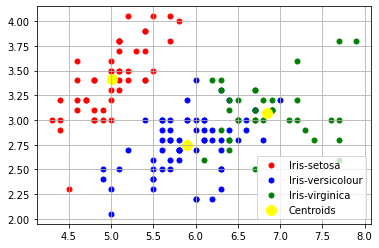

In [29]:

x = iris_data_num.iloc[:, [0, 1, 2, 3]].values
plt.scatter(x[predictions == 0, 0], x[predictions == 0, 1], s = 25, c = 'red', label = 'Iris-setosa')
plt.scatter(x[predictions == 1, 0], x[predictions == 1, 1], s = 25, c = 'blue', label = 'Iris-versicolour')
plt.scatter(x[predictions == 2, 0], x[predictions == 2, 1], s = 25, c = 'green', label = 'Iris-virginica')

# Plotting the cluster centers

plt.scatter(model.cluster_centers_[:, 0], model.cluster_centers_[:,1], s = 100, c = 'yellow', label = 'Centroids')
plt.legend()
plt.grid()
plt.show()

 **---- Thank You -----**